In [26]:
import pandas as pd

df = pd.read_csv('employee_performance.csv')
df.head()


,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,13-11-2021,4
1,E002,Nichole Peterson,Female,Finance,31002.41,02-07-2015,5
2,E003,Paul Blair,Female,Sales,73663.33,04-05-2023,1
3,E004,Michelle Thomas,Other,Marketing,84044.55,18-11-2019,1
4,E005,Jessica Berg,Female,Marketing,92527.68,30-11-2019,3


In [27]:
df['JoinDate']=pd.to_datetime(df['JoinDate'],format='%d-%m-%Y',errors='coerce')
df['Salary']=pd.to_numeric(df['Salary'],errors='coerce')
df['PerformanceRating']=pd.to_numeric(df['PerformanceRating'],errors='coerce')


df=df.dropna()


In [28]:
df['Tenure']= 2025- df['JoinDate'].dt.year

df['SalaryCategory']=pd.cut(df['Salary'],bins=[-float('inf'),50000,90000,float('inf')],
                            labels=['Low','Medium','High']
)


In [29]:
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().reset_index()


gender_count_by_dept = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)


avg_rating_by_dept = df.groupby('Department')['PerformanceRating'].mean().reset_index()


low_performers = df[df['PerformanceRating'] <= 2]

In [30]:
with pd.ExcelWriter('employee_analysis_result.xlsx') as writer:
    df.to_excel(writer, sheet_name='Cleaned_Data', index=False)
    avg_salary_by_dept.to_excel(writer, sheet_name='Avg_Salary_by_Dept', index=False)
    gender_count_by_dept.to_excel(writer, sheet_name='Gender_Count_by_Dept')
    avg_rating_by_dept.to_excel(writer, sheet_name='Avg_Rating_by_Dept', index=False)
    low_performers.to_excel(writer, sheet_name='Low_Performers', index=False)

print("Analysis complete. File saved as 'employee_analysis_result.xlsx'")

Analysis complete. File saved as 'employee_analysis_result.xlsx'


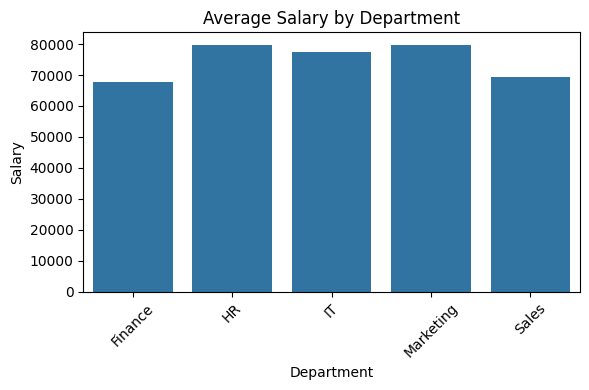

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart - Average Salary by Department
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_salary_by_dept, x='Department', y='Salary')
plt.title("Average Salary by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_salary_by_dept.png")
plt.show()
plt.close()

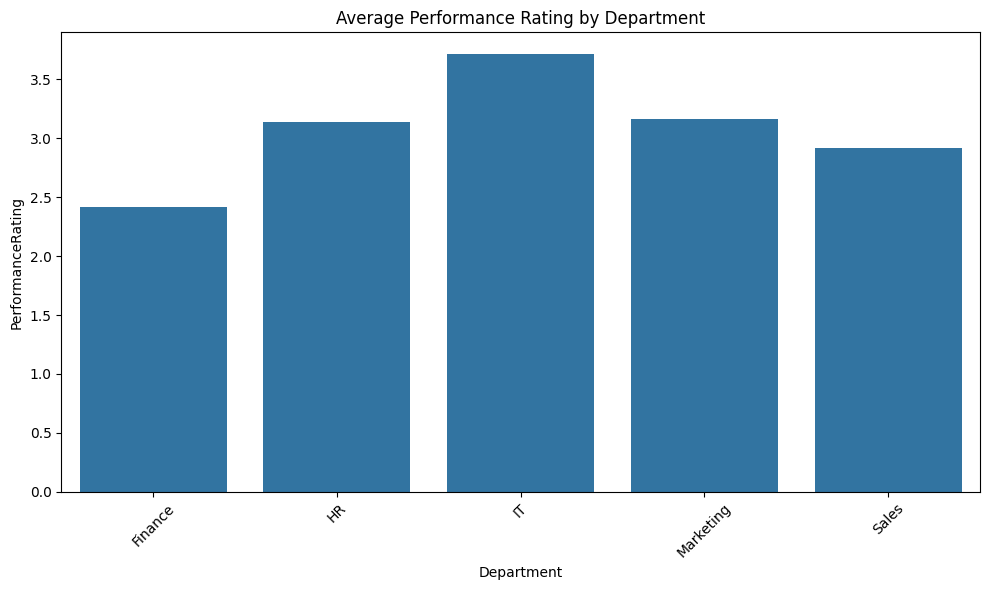

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_by_dept, x='Department', y='PerformanceRating')
plt.title('Average Performance Rating by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_rating_by_dept.png')
plt.show()
plt.close()

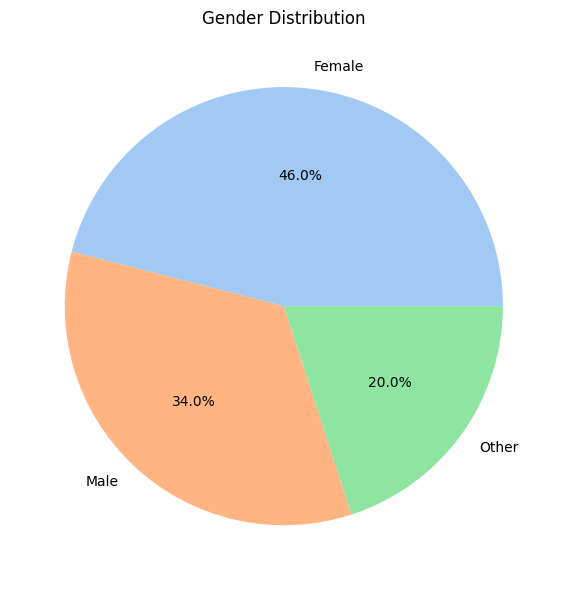

In [37]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.tight_layout()
plt.savefig('gender_distribution.png')
plt.show()
plt.close()

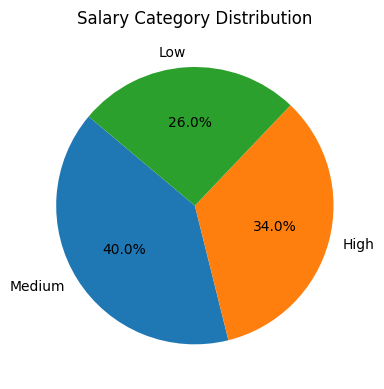

In [32]:
# Pie Chart - Salary Category Distribution
salary_category_counts = df['SalaryCategory'].value_counts()
plt.figure(figsize=(4,4))
salary_category_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Salary Category Distribution")
plt.ylabel('')
plt.tight_layout()
plt.savefig("salary_category_distribution.png")
plt.show()
plt.close()